<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/TF_3_3_%EC%BC%80%EB%9D%BC%EC%8A%A4_Fashion_MNIST_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 Fashion MNIST 모델

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

<sub>출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko</sub>

### modules import


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import get_file, plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

### 데이터셋 로드

In [ ]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size = 0.3,
                                                  random_state=111)

### 데이터 확인

In [ ]:
print(x_train_full.shape, y_train_full.shape)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)
(10000, 28, 28) (10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
class_names[y_train[0]]

'Pullover'

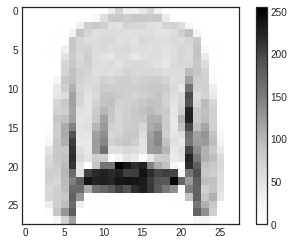

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

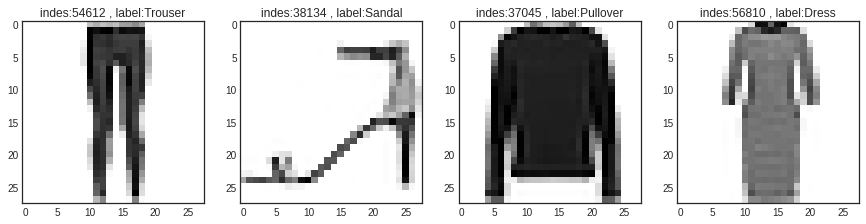

In [ ]:
num_sample = 4

random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15,10))
for i, idx in enumerate(random_idxs):
  image = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.imshow(image)
  plt.title("indes:{} , label:{}".format(idx, class_names[label]))

### 데이터 전처리
- Normalization

- flatten

- oss='sparse_categorical_crossentropy'

In [ ]:
x_train = (x_train.reshape(-1, 28*28)) / 255.
x_val = (x_val.reshape(-1, 28*28)) / 255.
x_test = (x_test.reshape(-1, 28*28)) / 255.

### 모델 구성 (함수형 API)

In [ ]:
input = Input(shape=(784,), name='input')
hideen1 = Dense(256, activation='relu', name='hidden1')(input)
hideen2 = Dense(128, activation='relu', name='hidden2')(hideen1)
hideen3 = Dense(64, activation='relu', name='hidden3')(hideen2)
hideen4 = Dense(32, activation='relu', name='hidden4')(hideen3)
output = Dense(10, activation='softmax', name='output')(hideen4)
model = Model(inputs=[input], outputs=output)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 hidden2 (Dense)             (None, 128)               32896     
                                                                 
 hidden3 (Dense)             (None, 64)                8256      
                                                                 
 hidden4 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainab

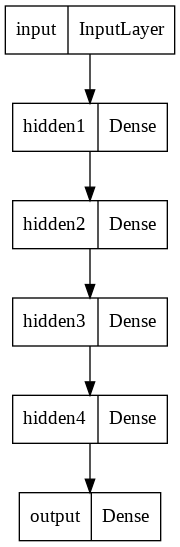

In [ ]:
plot_model(model)

### 모델 컴파일

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['acc'])

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/10
329/329 [==============================] - 3s 8ms/step - loss: 1.0323 - acc: 0.6834 - val_loss: 0.7837 - val_acc: 0.7123
Epoch 2/10
329/329 [==============================] - 3s 8ms/step - loss: 0.5407 - acc: 0.8062 - val_loss: 0.5575 - val_acc: 0.7861
Epoch 3/10
329/329 [==============================] - 3s 8ms/step - loss: 0.4872 - acc: 0.8310 - val_loss: 0.6752 - val_acc: 0.8366
Epoch 4/10
329/329 [==============================] - 3s 8ms/step - loss: 0.4777 - acc: 0.8392 - val_loss: 0.6356 - val_acc: 0.7736
Epoch 5/10
329/329 [==============================] - 3s 8ms/step - loss: 0.4577 - acc: 0.8460 - val_loss: 0.5613 - val_acc: 0.8373
Epoch 6/10
329/329 [==============================] - 3s 9ms/step - loss: 0.4382 - acc: 0.8504 - val_loss: 0.7955 - val_acc: 0.7361
Epoch 7/10
329/329 [==============================] - 3s 8ms/step - loss: 0.4593 - acc: 0.8519 - val_loss: 1.1813 - val_acc: 0.6958
Epoch 8/10
329/329 [==============================] - 3s 8ms/step - loss: 0.

### 학습 결과 시각화

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

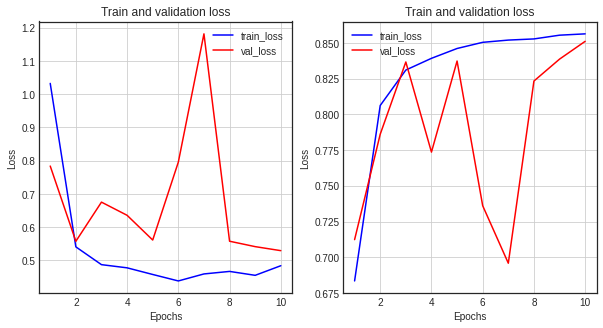

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_loss')
ax1.plot(epochs, val_acc, color='red', label='val_loss')
ax1.set_title('Train and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

plt.show()

### 다른 옵티마이저로 실행
- 아래의 과정 다시 실행
  - 데이터셋 로드
  - 데이터 전처리
  - 모델 구성


In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01),
              metrics=['acc'])

In [ ]:
history2 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/10
329/329 [==============================] - 3s 7ms/step - loss: 0.3315 - acc: 0.8842 - val_loss: 0.4237 - val_acc: 0.8731
Epoch 2/10
329/329 [==============================] - 2s 7ms/step - loss: 0.3196 - acc: 0.8858 - val_loss: 0.4526 - val_acc: 0.8591
Epoch 3/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3153 - acc: 0.8868 - val_loss: 0.4249 - val_acc: 0.8702
Epoch 4/10
329/329 [==============================] - 2s 7ms/step - loss: 0.3119 - acc: 0.8869 - val_loss: 0.4349 - val_acc: 0.8711
Epoch 5/10
329/329 [==============================] - 2s 7ms/step - loss: 0.3124 - acc: 0.8869 - val_loss: 0.4099 - val_acc: 0.8735
Epoch 6/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3095 - acc: 0.8871 - val_loss: 0.4153 - val_acc: 0.8736
Epoch 7/10
329/329 [==============================] - 2s 7ms/step - loss: 0.3084 - acc: 0.8876 - val_loss: 0.4390 - val_acc: 0.8592
Epoch 8/10
329/329 [==============================] - 2s 6ms/step - loss: 0.

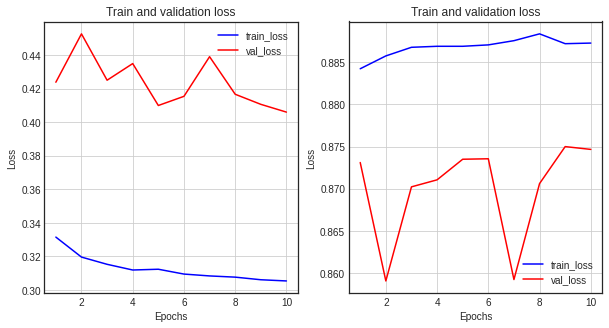

In [ ]:
history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_loss')
ax1.plot(epochs, val_acc, color='red', label='val_loss')
ax1.set_title('Train and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

plt.show()

### 모델 평가 (1)
- optimizer: SGD()로 학습한 모델

- evaluate

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4523 - acc: 0.8694


[0.4523088335990906, 0.8694000244140625]

### 학습된 모델을 통해 값 예측

In [ ]:
pred_ys = model.predict(x_test)

print(pred_ys.shape)
np.set_printoptions(precision=7)
print(pred_ys[0])

(10000, 10)
[3.1800580e-31 0.0000000e+00 3.3344893e-32 0.0000000e+00 0.0000000e+00
 1.7346302e-02 6.5950592e-28 1.0319417e-02 9.7448362e-25 9.7233433e-01]


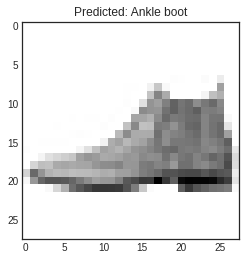

In [ ]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.imshow(x_test[0].reshape(-1, 28))
plt.title("Predicted: {}".format(class_names[arg_pred_y[0]]))
plt.show()

In [ ]:
def plot_image(i, pred_ys, y_test, img):
  pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_ys)
  if predicted_label == y_test:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]),
                                       color=color)

def plot_value_array(i, pred_ys, true_label):
  pred_ys, true_label = pred_ys[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])  
  thisplot = plt.bar(range(10), pred_ys, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(pred_ys)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

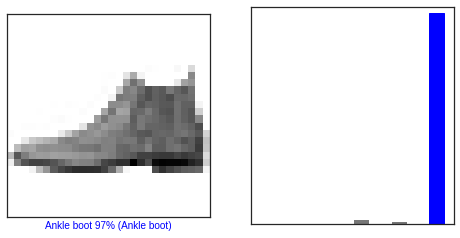

In [ ]:
i = 0
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1,2,2)
plot_value_array(i, pred_ys, y_test)
plt.show()

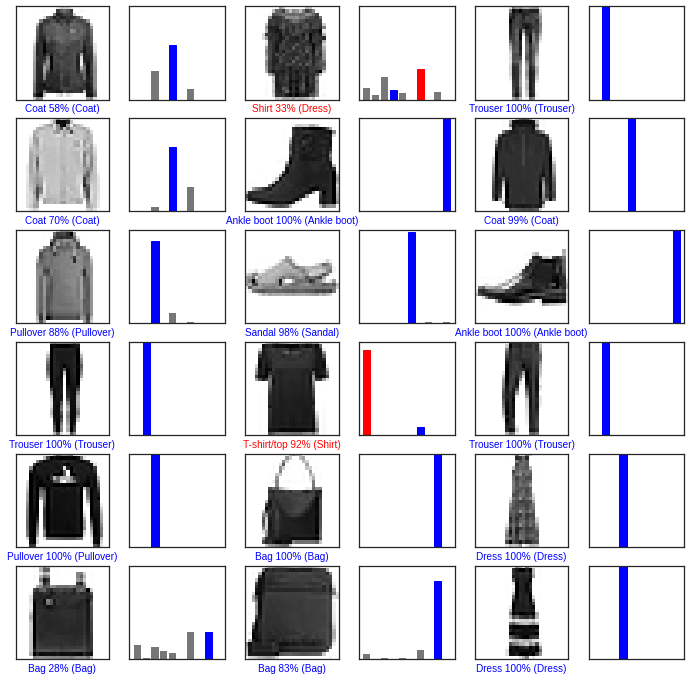

In [ ]:
num_rows = 6
num_cols = 3
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for idx, num in enumerate(random_num):
  plt.subplot(num_rows, 2*num_cols, 2*idx+1)
  plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
  plt.subplot(num_rows, 2*num_cols, 2*idx+2)
  plot_value_array(num, pred_ys, y_test)

plt.show()

### 모델 평가(2)
- optimizer: SGD()로 설정한 모델

- 혼동 행렬 (Confusion Matrix)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

from tensorflow.keras.utils import to_categorical

In [ ]:
y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

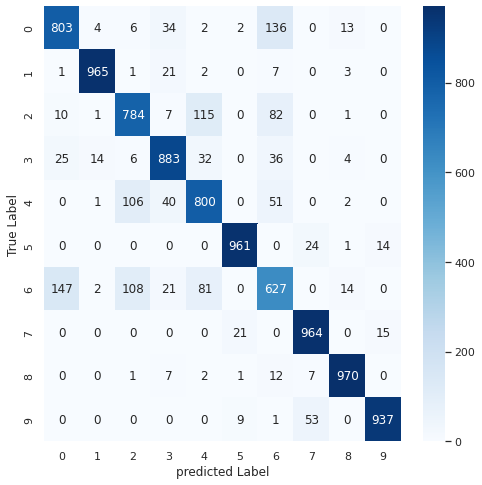

In [ ]:
plt.figure(figsize=(8,8))
cm2 = confusion_matrix(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel("predicted Label")
plt.ylabel("True Label")
plt.show()

### 모델 평가 (3)
- optimizer: SGD()로 설정한 모델

- 분류 보고서

In [ ]:
print(classification_report(np.argmax(y_test_che, axis = -1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.78      0.78      1000
           3       0.87      0.88      0.88      1000
           4       0.77      0.80      0.79      1000
           5       0.97      0.96      0.96      1000
           6       0.66      0.63      0.64      1000
           7       0.92      0.96      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

